In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Creating Dataframe object

In [2]:
Advertising=pd.read_csv('Advertising.csv')

In [3]:
Advertising.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
Advertising.shape

(200, 5)

In [5]:
Advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
Advertising.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


####  Data Cleaning

In [7]:
# checking the missing values:
Advertising.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

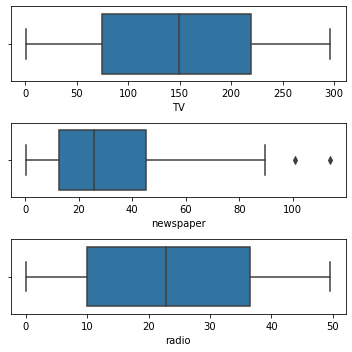

In [8]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(Advertising['TV'], ax = axs[0])
plt2 = sns.boxplot(Advertising['newspaper'], ax = axs[1])
plt3 = sns.boxplot(Advertising['radio'], ax = axs[2])
plt.tight_layout()

### Data Analysis

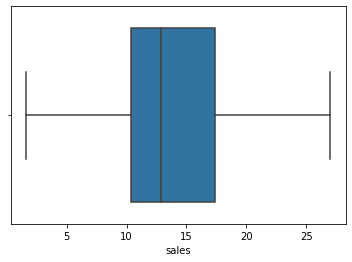

In [9]:
sns.boxplot(Advertising['sales'])
plt.show()

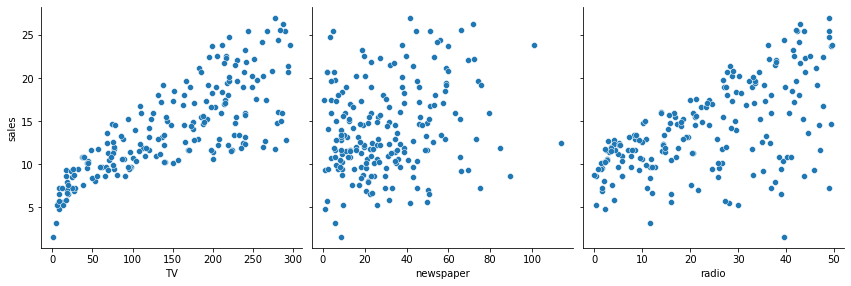

In [10]:
#scatter plot useing:
sns.pairplot(Advertising, x_vars=['TV', 'newspaper', 'radio'], y_vars='sales', height=4, aspect=1, kind='scatter')
plt.show()

### Data Correlation

<AxesSubplot:>

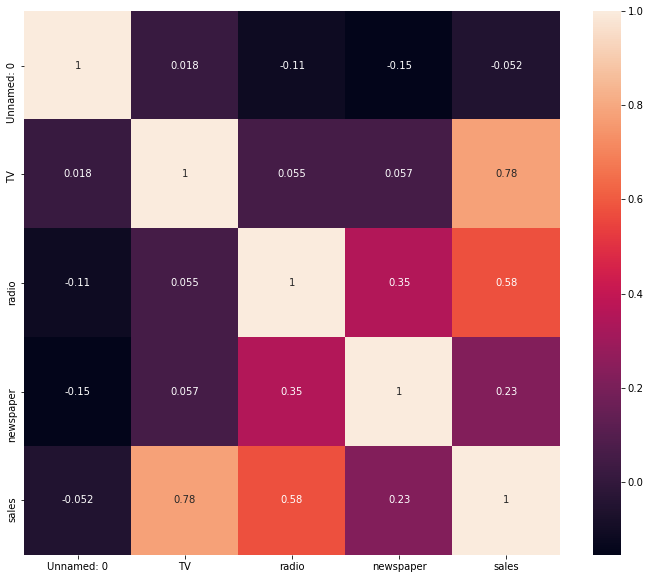

In [11]:
plt.figure(figsize=[12,10],facecolor='white')
sns.heatmap(Advertising.corr(),annot=True)

In [12]:
pd.pivot_table(Advertising, index = 'sales', values = ['TV','radio','newspaper'])

,TV,newspaper,radio
sales,,,
1.6,0.70,8.7,39.600000
3.2,4.10,5.7,11.600000
4.8,8.60,1.0,2.100000
5.3,9.25,17.5,15.150000
5.5,7.30,41.4,28.100000
...,...,...,...
24.7,220.30,3.2,49.000000
25.4,266.60,33.5,45.033333
25.5,283.60,66.2,42.000000


### Split datasets into train and test

In [13]:
X = Advertising['TV']
y = Advertising['sales']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 2)

In [15]:
print(X.shape,X_train.shape,X_test.shape)

(200,) (140,) (60,)


In [16]:
# the train dataset:
X_train.head()

28     248.8
133    219.8
94     107.4
42     293.6
169    284.3
Name: TV, dtype: float64

In [17]:
# the test dataset:
X_test.head()

112    175.7
29      70.6
182     56.2
199    232.1
193    166.8
Name: TV, dtype: float64

### Build the model

In [18]:
import statsmodels.api as sm

In [19]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

In [20]:
# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [21]:
lr.params

const    6.696681
TV       0.051121
dtype: float64

In [22]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     280.7
Date:                Sun, 27 Feb 2022   Prob (F-statistic):           4.57e-35
Time:                        15:32:24   Log-Likelihood:                -353.59
No. Observations:                 140   AIC:                             711.2
Df Residuals:                     138   BIC:                             717.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.6967      0.514     13.032      0.0

#### statistics data:

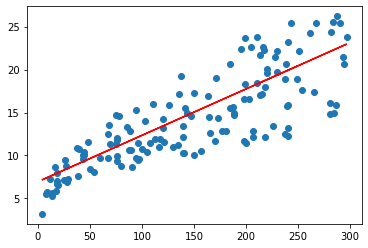

In [23]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

###  Model Evaluation

In [24]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

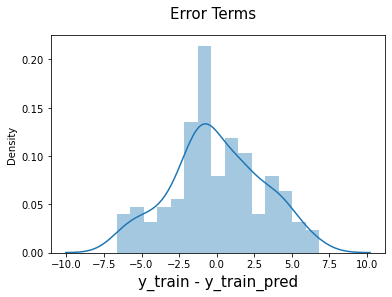

In [25]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  
plt.xlabel('y_train - y_train_pred', fontsize = 15)         
plt.show()

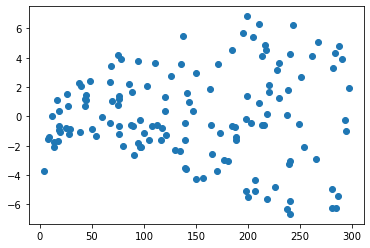

In [26]:
plt.scatter(X_train,res)
plt.show()

In [27]:
# Predictions on the Test Set:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [28]:
y_pred.head()

112    15.678658
29     10.305830
182     9.569687
199    18.561888
193    15.223680
dtype: float64

In [29]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [30]:
# Looking at the RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

3.7598125975955727

In [31]:
# Checking the R-squared on the test set:
r_squared = r2_score(y_test, y_pred)
r_squared

0.44388393501818624

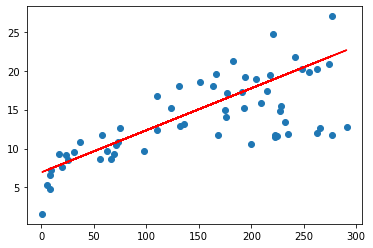

In [32]:
# Visualizing the fit on the test set:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()

In [33]:
# Create a DateFrame with the mininum and maximum values of Tv
X_new= pd.DataFrame({'TV':[Advertising.TV .min(),Advertising.TV.max()]})
X_new.head()

,TV
0,0.7
1,296.4


In [34]:
# Save the model:
import pickle
filename = 'Addtest'
pickle.dump(r_squared, open(filename, 'wb'))